<a href="https://colab.research.google.com/github/charindukavishan/GM-1-1-Model-Grey-Forecast-/blob/master/GM(1%2C1)_Model_(Grey_Forecast).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gray GM (1,1) Model**

Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

Import the dataset

In [0]:
x0 = np.array([520.3,482.4,635.7,1078.5,376.9,1095.8,724.3,593.1,416.7,531.5,617.7,999.1,757.9,483.7,591.5,288.9,486,475,899.2,775.1,766.4,762.4,615.4,885.8,885.9,718.1,675.4,644.3,533.2,482,836.5,690.1,856.2,510.4,1365.9,509.7,693.4,351.1,557.2,798.2,473.6,753.3,857,627.1])
# x0 = np.arange(1,101)

According  to  the  gray  system  theory  on  the  original  sequence  of  first-order accumulation (1-AGO) generated
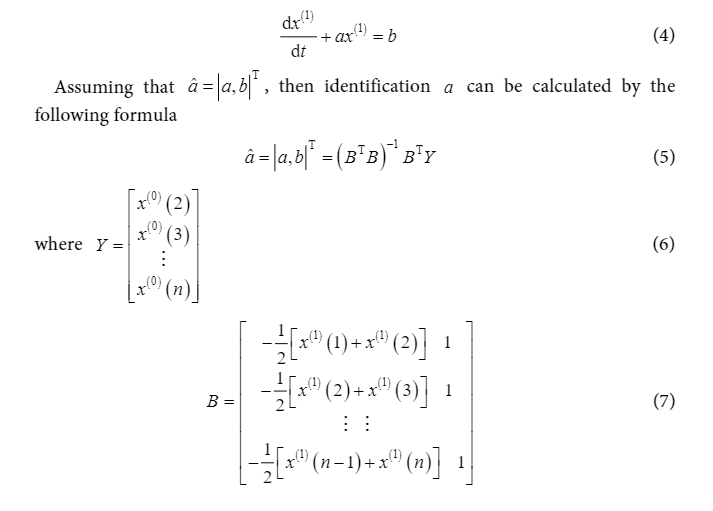

In [0]:
def accumu(lis):
    total = 0
    for x in lis:
        total += x
        yield total


x1 = list(accumu(x0))

In [0]:
def avg(lis):
  pre = lis[0]
  for x in lis:
      avgVal = (pre + x)/2
      pre = x
      yield avgVal

z1 = [x * -1 for x in list(avg(x1))]

z1 = np.delete(z1 ,0)

In [0]:
B = pd.DataFrame({'0':z1})
B['1']  = 1

B_ = B.to_numpy()
B_t = B.transpose().to_numpy()

In [0]:
E1_pre = B_t.dot(B_)

E1 = np.linalg.inv(E1_pre)

In [0]:
Xn = np.delete(x0 ,0)

In [0]:
E2 = B_t.dot(Xn)

In [0]:
parameter = E1.dot(E2)

a = parameter.item(0)
b = parameter.item(1)

The time response sequence 

In [0]:
def dif_eq(k):
  return (x0[1] - (b/a)) * math.exp(-1*a*(k-1)) + (b/a)

Compare the real value with the forcaste value

In [0]:
K = 30
X_forecast = dif_eq(K) - dif_eq(K-1)

print(x0[K])
print(X_forecast)

836.5
683.6988373522181


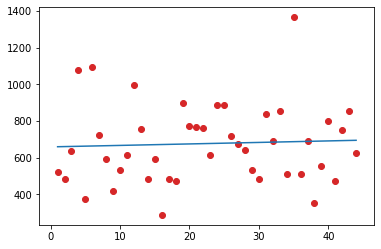

In [0]:
x_range = np.arange(1,x0.size+1)

def x_forecast(lis):
  for x in lis:
    x_fcst =  dif_eq(x) - dif_eq(x-1)
    yield x_fcst

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_range, list(x_forecast(x_range)), color='tab:blue')
ax.scatter(x_range, x0, color='tab:red')

# **Accuracy Test**

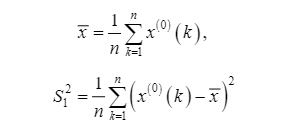

In [0]:
x0_mean = np.mean(x0)

S1_sq = np.var(x0)

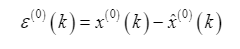

In [0]:
def residual():
  for K in range(len(x0)):
   res_val = x0[K] -(dif_eq(K) - dif_eq(K-1))
   yield res_val

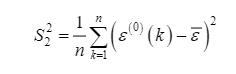

In [0]:
S2_sq = np.var(list(residual()))

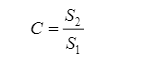  C is the mean square deviation

In [0]:
print(math.sqrt(S2_sq)/math.sqrt(S1_sq))

0.9976030367520015


# **References**

https://www.researchgate.net/publication/319605877_Application_of_Renewal_Gray_GM_11_Model_to_Prediction_of_Landslide_Deformation

http://iieta.org/sites/default/files/Journals/MMEP/02.1_05.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6112867/